In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Categorical Features encoding
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder ,  LabelEncoder

# Feature scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import  minmax_scale
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

# Pipline
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.multioutput import RegressorChain

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Ensempling models
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier,VotingClassifier,HistGradientBoostingClassifier


# Loss function 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Model tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_path = "/content/drive/MyDrive/final_proj/train.csv"
test_path = "/content/drive/MyDrive/final_proj/test.csv"
train_df = pd.DataFrame(pd.read_csv(train_path))
test_df = pd.DataFrame(pd.read_csv(test_path))

**artist:** Name of the Artist.

**song:** Name of the Track.

**popularity:** The higher the value the more popular the song is.

**danceability:** Danceability describes how suitable a track is for dancing ***based on a combination of musical elements including tempo, rhythm***

**energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.

**key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on..

**loudness:** The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative

**mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

**speechiness:** Speechiness detects the presence of spoken words in a track. ***The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.***


*   Values above 0.66 describe tracks that are probably made entirely of spoken words.
*   Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music.
*   Values below 0.33 most likely represent music and other non-speech-like tracks.

**acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

**instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". ***The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0***.

**liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. ***A value above 0.8 provides strong likelihood that the track is live***.

**valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. ***Tracks with high valence sound more positive*** (e.g. happy, cheerful, euphoric), while ***tracks with low valence sound more negative*** (e.g. sad, depressed, angry).

**tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**duration in milliseconds:** Time of the song

**time_signature:** a notational convention used in Western musical notation to specify how many beats (pulses) are contained in each measure (bar), and which note value is equivalent to a beat.

***Class:*** Genre of the track.


**Extra Knowledges** ⚡

**key:**

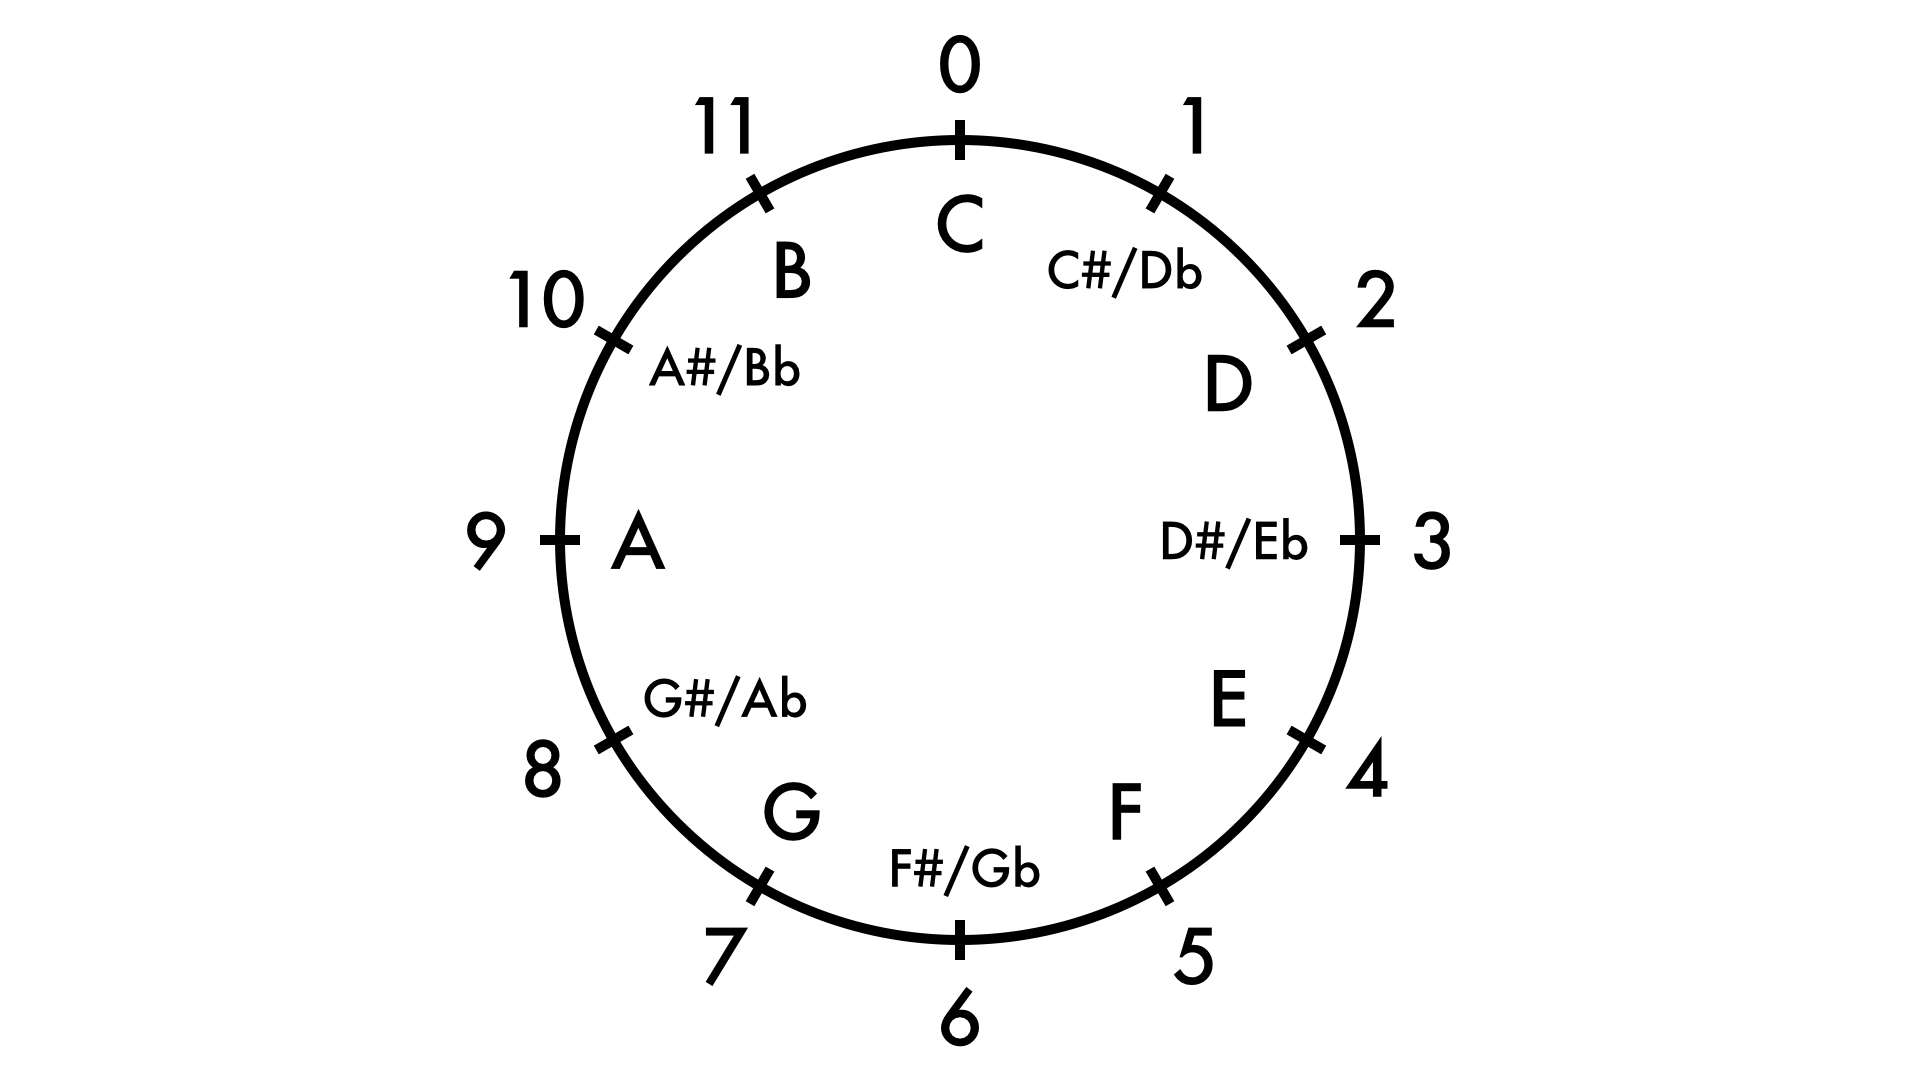

**loudness:**

0 dB means that you are right at the threshold of human hearing. A positive dB means that the sound is a few times louder than the threshold, while a negative dB means that you are a few times softer than that threshold.

0 dB also depends on the setting/context of the situation. For instance, when dealing with professional sound equipment, **0 dB usually refers to the loudest level before distortion begins**.
[What Is A Decibel?](https://www.scienceabc.com/pure-sciences/why-negative-decibels-are-a-thing.html)



**time_signature:** plus information about tempo. [What is the connection between time-signature, beat, and tempo?](https://music.stackexchange.com/questions/3346/what-is-the-connection-between-time-signature-beat-and-tempo)

**Important notes:**


*   Mode and valence represent the same information.
*   speechiness is inversely proportional to instrumentalness so they the represent same information.
*   loudness is inversely proportional to acousticness, and directly proportional to aliveness.
*   song name doesn't give us any useful information. so we will drop them.
*   duration_in min/ms doesn't give us any useful information. so we will drop them.
*   name of artist will affect the genre of the track.

artist label encoder func
left skewed to right skew func
log right skewed features
instrumentalness imputer


In [ ]:
train_df.drop("id",axis = 1,inplace = True)
test_df.drop("id",axis = 1,inplace = True)

In [ ]:
train_df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,"Lata Mangeshkar, Hariharan",Likha Hai Yeh,23.0,0.370,0.670,7.0,-11.007,0,0.0445,0.80900,0.000006,0.2360,0.8020,177.164,5.209333,3,3
1,Kalan.FrFr,No Love ft. Mozzy & Cypress Moreno,45.0,0.659,0.639,6.0,-8.138,1,0.3880,0.41600,NaN,0.1160,0.6880,99.517,206602.000000,4,5
2,The Cure,Play For Today,51.0,0.458,0.731,11.0,-12.049,0,0.1450,0.04870,0.021500,0.1160,0.7840,80.425,218960.000000,4,6
3,Miguel Poveda,Coplas Del Querer,40.0,0.508,0.287,5.0,-8.898,0,0.0481,0.83400,NaN,0.0963,0.3240,96.139,332467.000000,3,9
4,Leif Vollebekk,Long Blue Light,63.0,0.552,0.485,9.0,-9.111,1,0.0332,0.51700,0.106000,0.1640,0.5100,71.548,200173.000000,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14391,"Ólafur Arnalds, Alice Sara Ott",Verses,42.0,0.140,0.159,1.0,-17.845,0,0.0401,0.86700,0.917000,0.3920,0.0331,142.239,4.052667,3,7
14392,Citizen Cope,Something to Believe In,50.0,0.659,0.882,5.0,-7.039,1,0.0527,0.04620,0.011500,0.0919,0.8810,156.099,221840.000000,4,10
14393,WurlD,WAYO (KPE LE WU),41.0,0.696,0.535,4.0,-8.053,0,0.1460,0.42100,0.000018,0.1070,0.6620,91.943,196093.000000,4,9
14394,Rafferty,Making a Home,48.0,0.412,0.571,11.0,-6.006,1,0.0387,0.30400,NaN,0.2370,0.4730,159.697,238173.000000,4,9


number of columns in train and test datasets.

In [ ]:
print("Train columns: ",len(train_df.columns))
print("Test columns: ",len(test_df.columns))

Train columns:  17
Test columns:  16


In [ ]:
train_df.shape[0]

14396

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         14396 non-null  object 
 1   Track Name          14396 non-null  object 
 2   Popularity          14045 non-null  float64
 3   danceability        14396 non-null  float64
 4   energy              14396 non-null  float64
 5   key                 12784 non-null  float64
 6   loudness            14396 non-null  float64
 7   mode                14396 non-null  int64  
 8   speechiness         14396 non-null  float64
 9   acousticness        14396 non-null  float64
 10  instrumentalness    10837 non-null  float64
 11  liveness            14396 non-null  float64
 12  valence             14396 non-null  float64
 13  tempo               14396 non-null  float64
 14  duration_in min/ms  14396 non-null  float64
 15  time_signature      14396 non-null  int64  
 16  Clas

In [ ]:
print("Number of missing values in each columns: \n" ,train_df.isnull().sum())

Number of missing values in each columns: 
 Artist Name              0
Track Name               0
Popularity             351
danceability             0
energy                   0
key                   1612
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3559
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64


In [ ]:
print("ratio of missing values in each columns: (@%) \n" ,train_df.isnull().sum()/train_df.shape[0]*100)

ratio of missing values in each columns: (@%) 
 Artist Name            0.000000
Track Name             0.000000
Popularity             2.438177
danceability           0.000000
energy                 0.000000
key                   11.197555
loudness               0.000000
mode                   0.000000
speechiness            0.000000
acousticness           0.000000
instrumentalness      24.722145
liveness               0.000000
valence                0.000000
tempo                  0.000000
duration_in min/ms     0.000000
time_signature         0.000000
Class                  0.000000
dtype: float64


We note that there are too many missing values (above: 5% ratio) in "key" and "instrumentalness" columns, where we see that 2% ratio in the "Popularity" may look acceptable. Later, we will deal with all these missing values.

In [ ]:
print("<<<<<<<<<<<<<<<<<<<<<<<<<<<<<key>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>\n")
print(train_df["key"].value_counts())
print("<<<<<<<<<<<<<<<<<<<<<<<<<<<<<mode>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>\n")
print(train_df["mode"].value_counts())
print("<<<<<<<<<<<<<<<<<<<<<<<<<<<<<time_signature>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>\n")
print(train_df["time_signature"].value_counts())
print("<<<<<<<<<<<<<<<<<<<<<<<<<<<<<Class>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>\n")
print(train_df["Class"].value_counts())

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<key>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

7.0     1684
2.0     1592
9.0     1578
1.0     1329
4.0     1236
11.0    1167
5.0     1125
6.0      948
8.0      899
10.0     814
3.0      412
Name: key, dtype: int64
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<mode>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

1    9193
0    5203
Name: mode, dtype: int64
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<time_signature>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

4    13200
3      953
5      159
1       84
Name: time_signature, dtype: int64
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<Class>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

10    3959
6     2069
9     2019
8     1483
5     1157
1     1098
2     1018
0      500
7      461
3      322
4      310
Name: Class, dtype: int64


In [ ]:
train_df.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,14045.000000,14396.000000,14396.000000,12784.000000,14396.000000,14396.000000,14396.000000,14396.000000,10837.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000,14396.000000
mean,44.591954,0.542981,0.663347,5.957838,-7.897393,0.638580,0.079479,0.246606,0.177489,0.195594,0.486931,122.729981,2.009550e+05,3.927341,6.695679
std,17.436540,0.166668,0.235709,3.190628,4.063214,0.480429,0.083048,0.310371,0.304133,0.158487,0.240281,29.558253,1.118463e+05,0.352828,3.206170
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.013600,0.018300,34.132000,5.339167e-01,1.000000,0.000000
25%,33.000000,0.430000,0.510000,3.000000,-9.525250,0.000000,0.034800,0.004208,0.000088,0.097400,0.299000,99.799000,1.669988e+05,4.000000,5.000000
50%,44.000000,0.545000,0.701000,6.000000,-7.006000,1.000000,0.047400,0.080750,0.003920,0.129000,0.481000,120.069500,2.095845e+05,4.000000,8.000000
75%,56.000000,0.659000,0.861000,9.000000,-5.161000,1.000000,0.082500,0.434000,0.199000,0.257000,0.673000,141.990250,2.522970e+05,4.000000,10.000000
max,100.000000,0.989000,0.999000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [ ]:
train_df["Popularity"] = train_df["Popularity"] / 100
test_df["Popularity"] = test_df["Popularity"] / 100

In [ ]:
train_df_ = train_df.drop(["Track Name","Artist Name"], axis = 1 )
test_df_ = test_df.drop(["Track Name","Artist Name"], axis = 1 )

# Features selection

This section is important to have a good knowledge about features contributions in the training process.

**Apply SelectKBest Algo**

In [ ]:
x_ = train_df_.iloc[:,train_df_.columns != "Class"]
y_ = train_df_[["Class"]].copy()

In [ ]:
x_test = test_df_

In [ ]:
num_features = ["Popularity","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo"]
cat_features = ["mode",'key',"time_signature"]

Impute catigorical and numirical Data

In [ ]:
for i in cat_features:
    x_[i] = x_[i].fillna(x_[i].mode()[0])
for i in num_features:
    x_[i] = x_[i].fillna(x_[i].median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [ ]:
for i in cat_features:
    x_test[i] = x_test[i].fillna(x_[i].mode()[0])
for i in num_features:
    x_test[i] = x_test[i].fillna(x_[i].median())

In [ ]:
scaler = MinMaxScaler()
x_ = pd.DataFrame(scaler.fit_transform(x_), columns=x_.columns)
x_

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.222222,0.333979,0.670664,0.6,0.700729,0.0,0.023592,0.812249,0.000005,0.225466,0.809858,0.780385,0.50
1,0.444444,0.644932,0.639632,0.5,0.770184,1.0,0.391957,0.417671,0.003935,0.103812,0.692053,0.356741,0.75
2,0.505051,0.428664,0.731726,1.0,0.675503,0.0,0.131367,0.048896,0.021585,0.103812,0.791258,0.252575,0.75
3,0.393939,0.482462,0.287273,0.4,0.751785,0.0,0.027453,0.837349,0.003935,0.083840,0.315904,0.338311,0.50
4,0.626263,0.529804,0.485475,0.8,0.746629,1.0,0.011475,0.519076,0.106425,0.152474,0.508112,0.204142,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14391,0.414141,0.086507,0.159142,0.0,0.535188,0.0,0.018874,0.870482,0.920683,0.383617,0.015294,0.589833,0.50
14392,0.494949,0.644932,0.882881,0.4,0.796790,1.0,0.032386,0.046386,0.011545,0.079380,0.891495,0.665454,0.75
14393,0.404040,0.684743,0.535526,0.3,0.772242,0.0,0.132440,0.422691,0.000017,0.094688,0.665185,0.315418,0.75
14394,0.474747,0.379169,0.571563,1.0,0.821798,1.0,0.017373,0.305221,0.003935,0.226480,0.469877,0.685084,0.75


In [ ]:
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns)
x_test

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.515152,0.506078,0.725173,0.3,0.858478,1.0,0.018599,0.349749,0.000005,0.138863,0.322228,0.707886,0.75
1,0.686869,0.760158,0.447336,0.3,0.581533,1.0,0.045909,0.727638,0.003987,0.153148,0.990630,0.281375,0.75
2,0.494949,0.599168,0.475421,0.8,0.612563,1.0,0.012713,0.711558,0.003987,0.245995,0.901093,0.571748,0.75
3,0.393939,0.464462,0.871614,0.0,0.817320,1.0,0.039317,0.000386,0.000683,0.138863,0.338886,0.644057,0.75
4,0.636364,0.634213,0.842526,1.0,0.834415,1.0,0.016127,0.052764,0.003987,0.074992,0.527330,0.514782,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,0.353535,0.455700,0.746236,0.1,0.812227,1.0,0.267805,0.007568,0.003987,0.164371,0.104633,0.591447,0.75
3596,0.444444,0.548790,0.822466,0.1,0.837885,1.0,0.087699,0.002915,0.000172,0.489848,0.524206,0.339344,0.75
3597,0.494949,0.153433,0.290866,0.9,0.446978,1.0,0.016363,0.013367,0.506612,0.247016,0.021031,0.640919,0.75
3598,0.222222,0.176432,0.074514,0.9,0.277448,1.0,0.021542,0.929648,0.005869,0.117437,0.075898,0.291311,0.75


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
orderd_rank_features = SelectKBest(score_func=chi2,k= 13)
orderd_features = orderd_rank_features.fit(x_,y_)

In [ ]:
dfscors = pd.DataFrame(orderd_features.scores_,columns=["score"])
dfcolumns = pd.DataFrame(x_.columns,columns=["features"])
features_rank = pd.concat([dfcolumns,dfscors], axis= 1)

In [ ]:
features_rank.nlargest(13,"score")

,features,score
7,acousticness,1957.763327
8,instrumentalness,1883.040893
6,speechiness,572.498592
2,energy,388.576245
10,valence,248.574543
1,danceability,217.677466
5,mode,126.696700
0,Popularity,98.586131
4,loudness,55.326726
9,liveness,37.070012


**Information Gain**

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
mutual_info = mutual_info_classif(x_,y_)
mutual_data = pd.Series(mutual_info,index=x_.columns)
print(mutual_data.sort_values(ascending=False))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


acousticness        0.275148
energy              0.218006
instrumentalness    0.171354
danceability        0.166149
speechiness         0.144273
loudness            0.129319
Popularity          0.102958
valence             0.099683
tempo               0.066258
liveness            0.032502
time_signature      0.016583
mode                0.013874
key                 0.009626
dtype: float64


**Features Importance based on Models**

In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model1 = ExtraTreesClassifier()
model2 = XGBClassifier(objective='reg:squarederror')
model1.fit(x_,y_)
model2.fit(x_,y_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(objective='multi:softprob')

In [ ]:
EXT_ranked_features = pd.Series(model1.feature_importances_,index=x_.columns)
XGB_ranked_features = pd.Series(model2.feature_importances_,index=x_.columns)

In [ ]:
EXT_ranked_features.nlargest(13)

acousticness        0.107344
speechiness         0.104436
danceability        0.100111
energy              0.099950
Popularity          0.093377
instrumentalness    0.092887
valence             0.085783
loudness            0.080533
tempo               0.070647
liveness            0.069401
key                 0.061765
mode                0.016931
time_signature      0.016834
dtype: float64

In [ ]:
XGB_ranked_features.nlargest(13)

acousticness        0.153315
speechiness         0.152801
energy              0.120636
instrumentalness    0.099175
danceability        0.098883
Popularity          0.067206
mode                0.064347
valence             0.062535
loudness            0.052941
time_signature      0.052628
tempo               0.029699
liveness            0.025831
key                 0.020004
dtype: float32

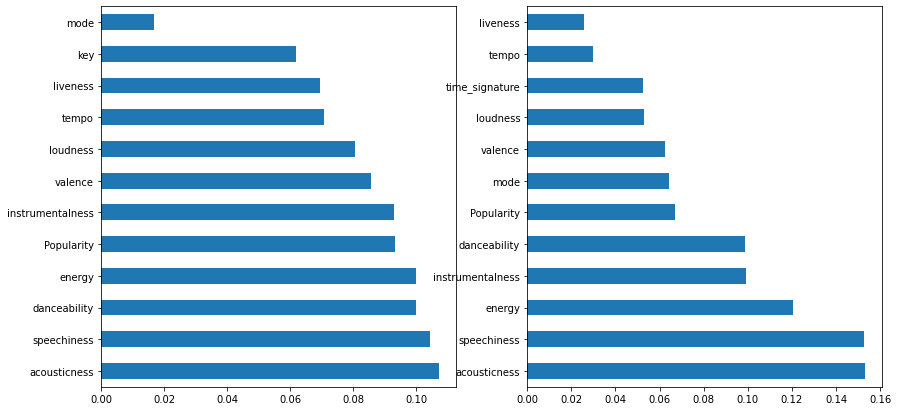

In [ ]:
fig ,ax = plt.subplots(1,2,figsize=(14,7))
EXT_ranked_features.nlargest(12).plot(kind = "barh", ax = ax[0])
XGB_ranked_features.nlargest(12).plot(kind = "barh", ax = ax[1])
plt.show()


**Linear correlation**

using pearson corroletion

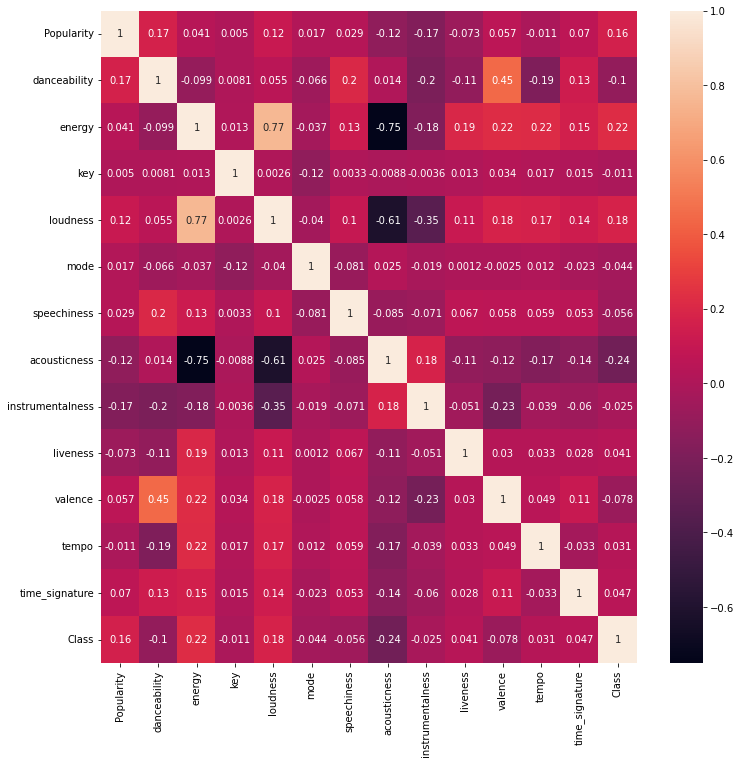

In [ ]:
corr = train_df_.corr(method='pearson')#'pearson', 'kendall', 'spearman'
top_features = corr.index
plt.figure(figsize=(12,12))
sns.heatmap(train_df_[top_features].corr(method='pearson'),annot=True)
plt.show()

we note that time_signature and key are useless so we can drop them

In [ ]:
x_.drop(["time_signature","key"], axis = 1 , inplace = True )

************************************

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         14396 non-null  object 
 1   Track Name          14396 non-null  object 
 2   Popularity          14045 non-null  float64
 3   danceability        14396 non-null  float64
 4   energy              14396 non-null  float64
 5   key                 12784 non-null  float64
 6   loudness            14396 non-null  float64
 7   mode                14396 non-null  int64  
 8   speechiness         14396 non-null  float64
 9   acousticness        14396 non-null  float64
 10  instrumentalness    10837 non-null  float64
 11  liveness            14396 non-null  float64
 12  valence             14396 non-null  float64
 13  tempo               14396 non-null  float64
 14  duration_in min/ms  14396 non-null  float64
 15  time_signature      14396 non-null  int64  
 16  Clas

In [ ]:
num_features = ["Popularity","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo"]
cat_features = ["Artist Name","Track Name","mode",'key',"time_signature"]

Impute catigorical and numirical Data

In [ ]:
for i in cat_features:
    train_df[i] = train_df[i].fillna(train_df[i].mode()[0])
for i in num_features:
    train_df[i] = train_df[i].fillna(train_df[i].median())

In [ ]:
for i in cat_features:
    test_df[i] = test_df[i].fillna(train_df[i].mode()[0])
for i in num_features:
    test_df[i] = test_df[i].fillna(train_df[i].median())

In [ ]:
Quantile_num_features = ["Popularity","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo",'duration_in min/ms']
skewed_scaler = QuantileTransformer(output_distribution='normal')
train_df[Quantile_num_features] = pd.DataFrame(skewed_scaler.fit_transform(train_df[Quantile_num_features]), columns=Quantile_num_features)
test_df[Quantile_num_features] = pd.DataFrame(skewed_scaler.fit_transform(test_df[Quantile_num_features]), columns=Quantile_num_features)

In [ ]:
norm_scaler = MinMaxScaler()
train_df[Quantile_num_features] = pd.DataFrame(norm_scaler.fit_transform(train_df[Quantile_num_features]), columns=Quantile_num_features)
test_df[Quantile_num_features] = pd.DataFrame(norm_scaler.fit_transform(test_df[Quantile_num_features]), columns=Quantile_num_features)

In [ ]:
train_df["key"]=train_df["key"].astype('int32')
test_df["key"]=test_df["key"].astype('int32')

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1 , test_size=0.25, random_state= 107)
for train_index, val_index in split.split(train_df.drop("Class", axis = 1),train_df["Class"]):
  x_train = train_df.drop("Class", axis = 1).iloc[train_index]
  y_train = train_df["Class"].iloc[train_index]
  x_val = train_df.drop("Class", axis = 1).iloc[val_index]
  y_val = train_df["Class"].iloc[val_index]

In [ ]:
x_train

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
6558,The Who,I Can't Explain - Mono Version,0.545429,0.517101,0.494568,9,0.573764,1,0.533352,0.485427,0.500000,0.369319,0.637038,0.553966,0.403810,4
2089,Dragony,Gods Of War,0.475238,0.443027,0.697461,7,0.660565,1,0.577614,0.364281,0.500000,0.607808,0.420160,0.557902,0.511233,4
10760,Annihilator,Phoenix Rising,0.520174,0.531564,0.522772,2,0.539482,0,0.373162,0.452945,0.374588,0.602542,0.376813,0.501019,0.531171,4
11528,T-Bone Walker,Call It Stormy Monday,0.550347,0.536704,0.372001,7,0.399140,1,0.480195,0.580431,0.460883,0.279584,0.492633,0.441988,0.456537,4
4813,Michael Schenker Group,In Search of the Peace of Mind,0.440271,0.272543,0.577313,9,0.535189,1,0.519312,0.502655,0.590642,0.492633,0.460818,0.674114,0.675610,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5929,MFnMelo,Mario Kart,0.475238,0.521162,0.512461,8,0.588605,1,0.670591,0.549978,0.500000,0.524513,0.475612,0.346979,0.475480,4
1106,Chris Cornell,Nearly Forgot My Broken Heart,0.579331,0.528776,0.530801,7,0.552104,1,0.355572,0.504680,0.319526,0.532457,0.558708,0.494380,0.539900,4
6142,The Dust Coda,Breakdown,0.475238,0.337006,0.577982,5,0.609125,0,0.569718,0.375150,0.417586,0.583650,0.593226,0.392311,0.537379,4
13733,"Dublin, Texas",RF Shannon,0.493238,0.481426,0.439978,8,0.456807,0,0.329988,0.456539,0.583826,0.422853,0.525012,0.334210,0.378421,4


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
from catboost import Pool, CatBoostClassifier
#model = CatBoostClassifier(iterations=100)
train_dataset = Pool(data=x_train,label=y_train,cat_features=cat_features)
eval_dataset = Pool(data=x_val,label=y_val,cat_features=cat_features)

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=10000,
                           learning_rate=0.01,
                           loss_function='MultiClass')

In [ ]:
model.fit(train_dataset)

Streaming output truncated to the last 5000 lines.
4999:	learn: 0.6798866	total: 43m 15s	remaining: 43m 15s
5000:	learn: 0.6798501	total: 43m 16s	remaining: 43m 15s
5001:	learn: 0.6797664	total: 43m 16s	remaining: 43m 14s
5002:	learn: 0.6796887	total: 43m 17s	remaining: 43m 14s
5003:	learn: 0.6796374	total: 43m 17s	remaining: 43m 13s
5004:	learn: 0.6796202	total: 43m 18s	remaining: 43m 13s
5005:	learn: 0.6796002	total: 43m 18s	remaining: 43m 12s
5006:	learn: 0.6795528	total: 43m 19s	remaining: 43m 12s
5007:	learn: 0.6795295	total: 43m 20s	remaining: 43m 11s
5008:	learn: 0.6794844	total: 43m 20s	remaining: 43m 11s
5009:	learn: 0.6794489	total: 43m 21s	remaining: 43m 10s
5010:	learn: 0.6794259	total: 43m 21s	remaining: 43m 10s
5011:	learn: 0.6793789	total: 43m 22s	remaining: 43m 9s
5012:	learn: 0.6793313	total: 43m 22s	remaining: 43m 9s
5013:	learn: 0.6792656	total: 43m 23s	remaining: 43m 8s
5014:	learn: 0.6792009	total: 43m 23s	remaining: 43m 8s
5015:	learn: 0.6791650	total: 43m 24s	rem

In [ ]:
y_pred = model.predict(x_val)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       125
           1       0.47      0.14      0.21       275
           2       0.65      0.65      0.65       255
           3       0.83      0.81      0.82        80
           4       0.82      0.78      0.80        77
           5       0.77      0.82      0.79       289
           6       0.50      0.55      0.52       517
           7       0.93      0.94      0.94       115
           8       0.74      0.72      0.73       371
           9       0.70      0.65      0.67       505
          10       0.62      0.72      0.67       990

    accuracy                           0.66      3599
   macro avg       0.71      0.69      0.69      3599
weighted avg       0.65      0.66      0.65      3599



In [ ]:
#from sklearn.model_selection import train_test_split
#x_train , x_test , y_train , y_test = train_test_split(x_,y_,test_size= 0.25,random_state=42)

In [ ]:
def dest_plots (data,rows=3,cols=4,figsize=(20,20)):
  fig ,ax = plt.subplots(rows,cols,figsize=figsize)
  i = j = 0
  for col in list(data.columns):
    sns.distplot(data[col],ax=ax[j][i]);
    i = i + 1
    if i == cols:
      j = j + 1
      i = 0
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

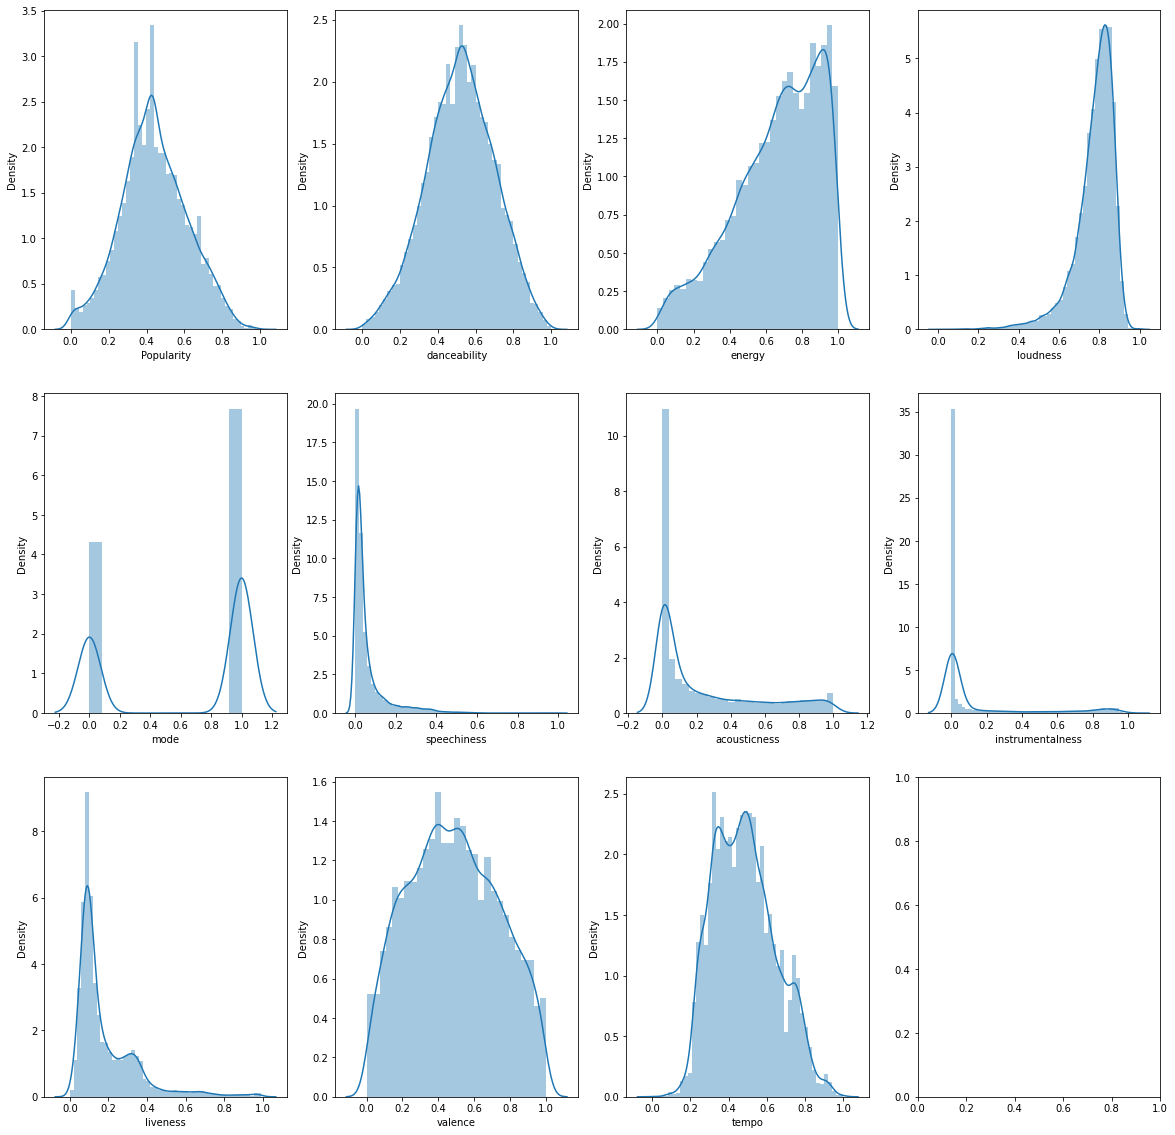

In [ ]:
dest_plots(data = x_train)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

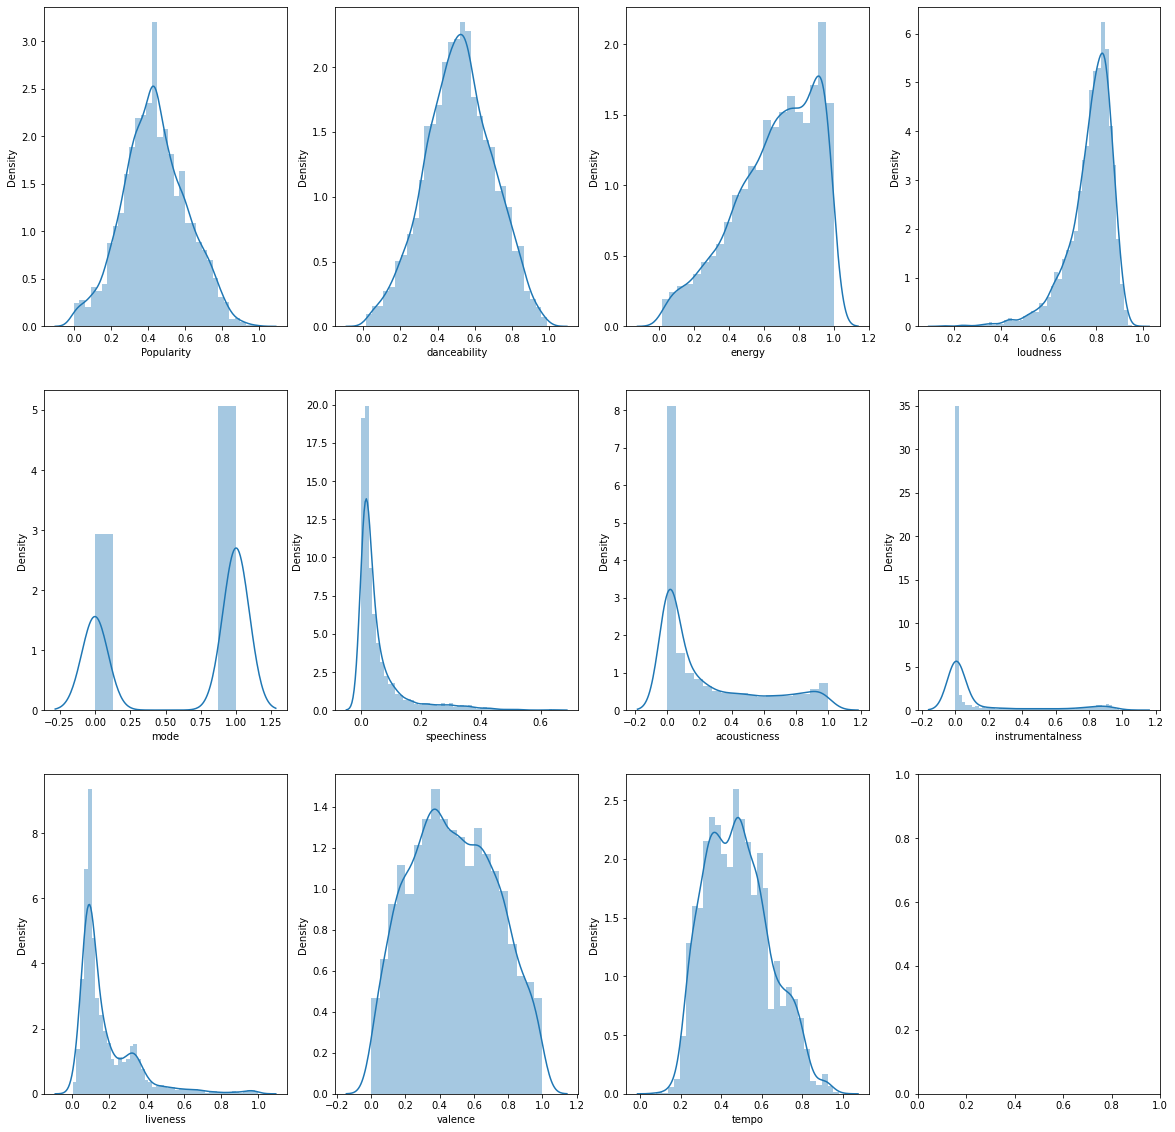

In [ ]:
dest_plots(data= x_test)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(test_df_.shape)

(10797, 11)
(10797, 1)
(3599, 11)
(3599, 1)
(3600, 13)


In [ ]:
x_train["class"] = y_train

In [ ]:
x_train

,Popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,class
13416,0.313131,0.226383,0.856854,0.716126,1.0,0.262198,0.013655,0.063553,0.043491,0.142296,0.330935,6
1511,0.575758,0.428664,0.635628,0.780860,1.0,0.270777,0.451807,0.000107,0.101784,0.554614,0.315325,5
8374,0.585859,0.703034,0.794791,0.769337,1.0,0.076997,0.197791,0.000232,0.597526,0.974166,0.664597,1
12911,0.454545,0.505057,0.861859,0.711042,1.0,0.059946,0.293173,0.225903,0.304542,0.381007,0.340390,6
10182,0.171717,0.753604,0.713708,0.698792,1.0,0.009973,0.002490,0.003935,0.109895,0.891495,0.354095,6
...,...,...,...,...,...,...,...,...,...,...,...,...
5191,0.373737,0.319991,0.757753,0.785944,0.0,0.019839,0.000846,0.004366,0.251825,0.485378,0.741194,2
13418,0.171717,0.335055,0.899898,0.869005,1.0,0.046327,0.000030,0.000158,0.023418,0.522579,0.577192,10
5390,0.595960,0.917151,0.596588,0.726100,1.0,0.459517,0.483936,0.000369,0.094688,0.824326,0.307343,5
860,0.111111,0.811706,0.724719,0.795507,1.0,0.089544,0.304217,0.003935,0.097729,0.396507,0.577083,5


# Outliers Checking 

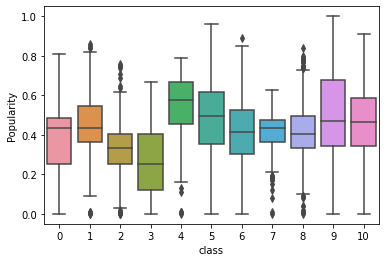

In [ ]:
sns.boxplot(data=x_train , y = "Popularity" ,x= "class")

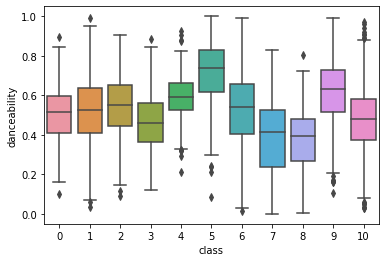

In [ ]:
sns.boxplot(data=x_train , y = "danceability" ,x= "class")

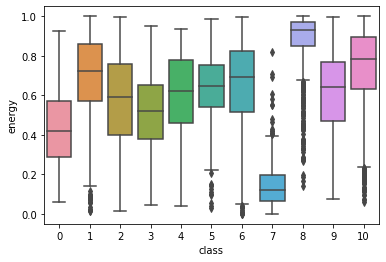

In [ ]:
sns.boxplot(data=x_train , y = "energy" ,x= "class")

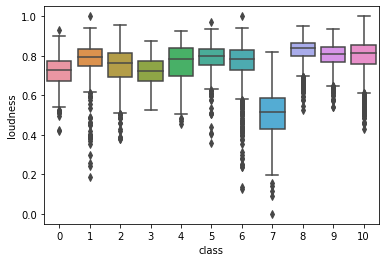

In [ ]:
sns.boxplot(data=x_train , y = "loudness" ,x= "class")

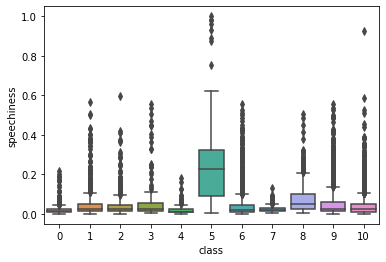

In [ ]:
sns.boxplot(data=x_train , y = "speechiness" ,x= "class")

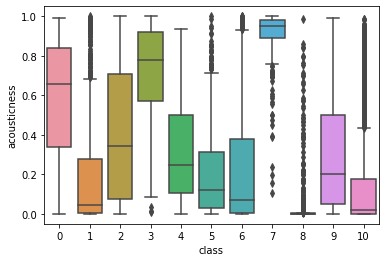

In [ ]:
sns.boxplot(data=x_train , y = "acousticness" ,x= "class")

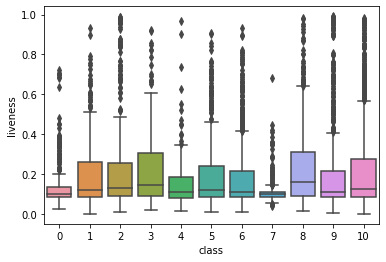

In [ ]:
sns.boxplot(data=x_train , y = "liveness" ,x= "class")

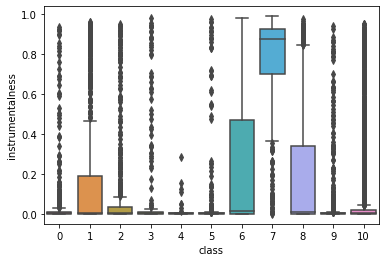

In [ ]:
sns.boxplot(data=x_train , y = "instrumentalness" ,x= "class")

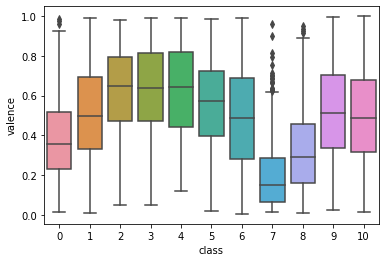

In [ ]:
sns.boxplot(data=x_train , y = "valence" ,x= "class")

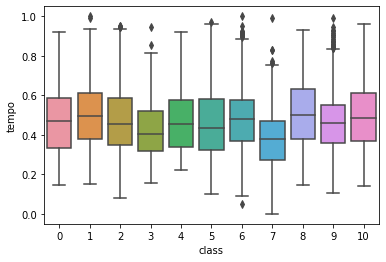

In [ ]:
sns.boxplot(data=x_train , y = "tempo" ,x= "class")

**IQR removing outliers**

In [ ]:
def outliers(df,column,a=25,b=75):
  x=df[column]
  q1, q3 = x.quantile(a/100),x.quantile(b/100)
  iqr = q3 - q1
  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)
  details_mat = [column,lower_bound,upper_bound, x.median()]
  print("<<<<<<<<",column,">>>>>>>>")
  print("lower bound: ",lower_bound)
  print("upper bound: ",upper_bound)
  mask = x.between( lower_bound, upper_bound, inclusive="both")
  inliers_mask = mask[mask==True]
  outliers_mask = mask[mask==False] # outliers
  return outliers_mask, inliers_mask, details_mat

In [ ]:
clean_df = x_train.copy()
outliers_df = x_train.copy()
details_mat = []
for col in clean_df.drop(['mode', 'class'], axis=1).columns:
  out, _ , mat= outliers(df= clean_df,column=col)
  details_mat = details_mat + [mat]
  clean_df = clean_df.drop(out.index,axis=0)
  print("min = ",clean_df [col].min())
  print("max = ",clean_df [col].max())
outliers_df = outliers_df[~outliers_df.isin(clean_df.to_dict("list")).all(axis=1)]
outliers_df.shape

<<<<<<<< Popularity >>>>>>>>
lower bound:  -0.02525252525252536
upper bound:  0.9040404040404043
min =  0.0
max =  0.8989898989898991
<<<<<<<< danceability >>>>>>>>
lower bound:  0.030019367333763702
upper bound:  1.0156014633096624
min =  0.030126963632451056
max =  1.0
<<<<<<<< energy >>>>>>>>
lower bound:  -0.011532066167110111
upper bound:  1.3858937273700354
min =  0.0
max =  1.0
<<<<<<<< loudness >>>>>>>>
lower bound:  0.5788788825138597
upper bound:  1.0009380976589926
min =  0.5794901590529451
max =  1.0
<<<<<<<< speechiness >>>>>>>>
lower bound:  -0.06833780160857908
upper bound:  0.14849865951742625
min =  0.0
max =  0.14745308310991959
<<<<<<<< acousticness >>>>>>>>
lower bound:  -0.5540411646586345
upper bound:  0.931621485943775
min =  0.0
max =  0.9307228915662652
<<<<<<<< instrumentalness >>>>>>>>
lower bound:  -0.060375060617530736
upper bound:  0.10132389691154309
min =  1.0040170723063254e-08
max =  0.10040070321355746
<<<<<<<< liveness >>>>>>>>
lower bound:  -0.16484

(4104, 12)

In [ ]:
details_df = pd.DataFrame(details_mat, columns= ["feature","lower_bound","upper_bound","median_"])
details_df

,feature,lower_bound,upper_bound,median_
0,Popularity,-0.025253,0.904040,0.434343
1,danceability,0.030019,1.015601,0.523348
2,energy,-0.011532,1.385894,0.703698
3,loudness,0.578879,1.000938,0.797661
4,speechiness,-0.068338,0.148499,0.027882
5,acousticness,-0.554041,0.931621,0.061948
6,instrumentalness,-0.060375,0.101324,0.003935
7,liveness,-0.164842,0.500203,0.120032
8,valence,-0.232820,1.255244,0.500878
9,tempo,0.010135,0.941913,0.474008


In [ ]:
def split(data,cat_col):
  """
  data : input dataframe
  cat_col : string represent the name of column that i would split the dataframe using its' values. 
  output: is a dictionary key is the class name and value is the cooresponding dataframe
  """
  output= {}
  for class_ in list(data[cat_col].unique()):
    output[class_] = data[data[cat_col] == class_]
  return output


In [ ]:
def outliers_in_every_class(data, class_name):
  dfs = split(data, class_name)
  outlis_df = data.copy()
  i =0
  more_details_mat = []
  for key in list(dfs.keys()):
    cln_df = dfs[key].copy()
    print(key)
    for col in cln_df.drop(['mode', 'class'], axis=1).columns:
      out, _ , mat = outliers(df= cln_df,column=col)
      mat = mat + [key]
      more_details_mat = more_details_mat + [mat]
      cln_df = cln_df.drop(out.index,axis=0)
      print("min = ",cln_df [col].min())
      print("max = ",cln_df [col].max())
    if i == 0:
      inlier_df = cln_df
    else:
      inlier_df = pd.concat([inlier_df, cln_df]).drop_duplicates()
    outlis_df = outlis_df[~outlis_df.isin(cln_df.to_dict("list")).all(axis=1)]
    i = i+1
    print(inlier_df.shape)
    print(outlis_df.shape)
  return inlier_df, outlis_df , more_details_mat

In [ ]:
inlier_df, outlis_df, more_details_mat = outliers_in_every_class(x_train , "class")

6
<<<<<<<< Popularity >>>>>>>>
lower bound:  -0.030303030303030554
upper bound:  0.858585858585859
min =  0.0
max =  0.8484848484848485
<<<<<<<< danceability >>>>>>>>
lower bound:  0.02679147837314394
upper bound:  1.0381966860340006
min =  0.0286206154508285
max =  0.9924682590918873
<<<<<<<< energy >>>>>>>>
lower bound:  0.0471528100120554
upper bound:  1.2934243808958277
min =  0.049430133565276646
max =  0.9969969359737739
<<<<<<<< loudness >>>>>>>>
lower bound:  0.5826161425424263
upper bound:  0.9774402643619726
min =  0.5830004599704651
max =  0.9390418088943763
<<<<<<<< speechiness >>>>>>>>
lower bound:  -0.04227882037533512
upper bound:  0.1007774798927614
min =  0.0007506702412868639
max =  0.10026809651474532
<<<<<<<< acousticness >>>>>>>>
lower bound:  -0.48546686746987955
upper bound:  0.8230070281124499
min =  1.1947791164658635e-06
max =  0.820281124497992
<<<<<<<< instrumentalness >>>>>>>>
lower bound:  -0.5451872943647533
upper bound:  0.9110470994448789
min =  3.01205

In [ ]:
more_details_df = pd.DataFrame(more_details_mat, columns= ["feature","lower_bound","upper_bound","median_", "class"])
more_details_df

,feature,lower_bound,upper_bound,median_,class
0,Popularity,-0.030303,0.858586,0.414141,6
1,danceability,0.026791,1.038197,0.539488,6
2,energy,0.047153,1.293424,0.692186,6
3,loudness,0.582616,0.977440,0.784661,6
4,speechiness,-0.042279,0.100777,0.021555,6
...,...,...,...,...,...
105,acousticness,-0.479669,1.080572,0.247490,4
106,instrumentalness,-0.005829,0.009793,0.003935,4
107,liveness,-0.066948,0.341304,0.110401,4
108,valence,-0.158675,1.393459,0.647618,4


In [ ]:
print(x_train.shape)
print("outliers on every class")
print(inlier_df.shape)
print(outlis_df.shape)
# 10777
print("outliers on all the dataset")
print(clean_df.shape)
print(outliers_df.shape)
# 10797

(10797, 12)
outliers on every class
(7141, 12)
(3638, 12)
outliers on all the dataset
(6693, 12)
(4104, 12)


In [ ]:
ooo=outlis_df[outlis_df.isin(outliers_df.to_dict("list")).all(axis=1)]
ooo.shape

(2493, 12)

In [ ]:
y_ = inlier_df["class"]
y_o = outlis_df["class"]
x_ = inlier_df.drop("class",axis = 1) 
x_o = outlis_df.drop("class",axis = 1)

In [ ]:
# Data augmentation
import imblearn
print(imblearn.__version__)

0.8.1


In [ ]:
from imblearn.over_sampling import SMOTE
oversample= SMOTE()
x1 , y1 = oversample.fit_resample(x_,y_)

In [ ]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=11)
Kmean.fit(x1)
Kmean.cluster_centers_

array([[4.75087046e-01, 6.64228253e-01, 7.08055843e-01, 8.02837809e-01,
        1.08801856e-14, 8.99167848e-02, 1.36286664e-01, 2.05342957e-02,
        1.51358134e-01, 6.63041988e-01, 4.53834971e-01],
       [4.88381563e-01, 5.78233695e-01, 5.30906692e-01, 7.67988075e-01,
        1.00000000e+00, 4.64266129e-02, 2.41055585e-01, 1.02732376e-02,
        1.28573368e-01, 3.63345645e-01, 4.51986609e-01],
       [4.31854921e-01, 4.10252752e-01, 8.46851663e-01, 8.34920226e-01,
        1.00000000e+00, 5.24737473e-02, 2.31083568e-02, 2.12682634e-02,
        1.92148219e-01, 3.83769954e-01, 5.36657700e-01],
       [4.38219954e-01, 4.35017744e-01, 1.39921693e-01, 4.98542436e-01,
        1.88737914e-15, 2.31944320e-02, 9.42624212e-01, 8.55651943e-01,
        9.76091398e-02, 1.62919008e-01, 3.65090849e-01],
       [4.99983461e-01, 6.37722866e-01, 7.39043706e-01, 7.99843245e-01,
        1.00000000e+00, 5.52035210e-02, 1.15425636e-01, 1.21458273e-02,
        1.49107662e-01, 7.59070513e-01, 4.80895320e-

In [ ]:
Kmean.cluster_centers_.shape

(11, 11)

In [ ]:
x_o["kmean_class"] = Kmean.predict(x_o)

In [ ]:
x_o["class"] = y_o

In [ ]:
x_o 

,Popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,kmean_class,class
13416,0.313131,0.226383,0.856854,0.716126,1.0,0.262198,0.013655,0.063553,0.043491,0.142296,0.330935,2,6
8374,0.585859,0.703034,0.794791,0.769337,1.0,0.076997,0.197791,0.000232,0.597526,0.974166,0.664597,4,1
12458,0.222222,0.598666,0.784780,0.768683,0.0,0.015121,0.000066,0.905622,0.058901,0.361372,0.479404,6,1
3424,0.797980,0.669679,0.900899,0.845474,1.0,0.069491,0.089458,0.063252,0.055657,0.949364,0.363310,4,9
9144,0.484848,0.538412,0.730725,0.829448,1.0,0.014692,0.219880,0.144577,0.167680,0.976232,0.640874,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,0.383838,0.763288,0.517508,0.739173,0.0,0.558177,0.374498,0.003935,0.589416,0.855327,0.441168,0,6
6265,0.434343,0.473854,0.268253,0.690682,0.0,0.007507,0.845382,0.000011,0.096715,0.141263,0.473931,7,10
5734,0.323232,0.204863,0.946946,0.877333,0.0,0.121716,0.009669,0.000807,0.279197,0.341738,0.691528,6,8
11964,0.696970,0.628793,0.919918,0.814947,1.0,0.036032,0.181727,0.134537,0.616788,0.881162,0.454633,4,6


In [ ]:
x_o[x_o["class"] == x_o["kmean_class"]]

,Popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,kmean_class,class
2380,0.171717,0.586830,0.872870,0.751035,1.0,0.026166,0.221888,0.815261,0.114964,0.302470,0.473795,10,10
8696,0.606061,0.559931,0.816813,0.842158,1.0,0.053727,0.132530,0.003935,0.064882,0.822259,0.304478,4,4
13884,0.727273,0.310308,0.875873,0.852011,0.0,0.189276,0.034237,0.003935,0.104826,0.401674,0.736671,6,6
2046,0.434343,0.606198,0.965965,0.890769,0.0,0.379088,0.001355,0.000001,0.474858,0.338638,0.545241,6,6
11317,0.151515,0.375941,0.831828,0.855206,1.0,0.083110,0.000010,0.769076,0.056367,0.261135,0.430758,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6668,0.434343,0.293092,0.933933,0.854456,1.0,0.148525,0.001958,0.676707,0.280211,0.067273,0.762794,10,10
2790,0.373737,0.453411,0.747743,0.805675,1.0,0.028097,0.004056,0.532128,0.207218,0.503979,0.762756,10,10
9062,0.565657,0.397461,0.993994,0.900090,1.0,0.144236,0.000047,0.765060,0.151460,0.245634,0.752646,10,10
14039,0.555556,0.484614,0.389377,0.620597,0.0,0.017051,0.287149,0.000399,0.639092,0.622817,0.326859,0,0


In [ ]:
#details_df

In [ ]:
#float(details_df[details_df["feature"]=="tempo"].upper_bound)

In [ ]:
#dfs = split(x_o_sem, "class")
#dfs[8].shape
#mask = dfs[8]["Popularity"].between( 0.2, 0.9, inclusive="both")
#out = mask[mask==False] # outliers
#dfs[8]["Popularity"].where(out , inplace = True)


In [ ]:
#dfs[8]["Popularity"].fillna("median",inplace = True)

In [ ]:
#dfs[8][dfs[8].index==12121]

In [ ]:
#dfs[8].info()

In [ ]:
#out

In [ ]:
def impute_outliers(data, details, class_name):
  dfs = split(data, class_name)
  details_dfs = split(details, class_name)
  i =0
  for key in list(dfs.keys()):
    cln_df = dfs[key].copy()
    detail_df = details_dfs[key].copy()
    for col in cln_df.drop(['mode', 'class'], axis=1).columns:
      lower_bound = float(detail_df[detail_df["feature"]==col].lower_bound)
      upper_bound = float(detail_df[detail_df["feature"]==col].upper_bound)
      median = float(detail_df[detail_df["feature"]==col].median_)
      mask = cln_df[col].between( lower_bound, upper_bound, inclusive="both")
      out = mask[mask==False] # outliers
      cln_df[col].where(out , inplace = True)
      cln_df[col].fillna(median,inplace = True)  
    if i == 0:
      inlier_df = cln_df
    else:
      inlier_df = pd.concat([inlier_df, cln_df])
    i = i+1
    print(inlier_df.shape)
  return inlier_df

In [ ]:
x_o["class"] =  x_o["kmean_class"]
x_o.drop("kmean_class",axis=1,inplace = True)
x_o_imputed = impute_outliers(data = x_o, details = more_details_df , class_name= "class")

(509, 12)
(860, 12)
(1360, 12)
(1733, 12)
(1998, 12)
(2362, 12)
(2608, 12)
(2915, 12)
(3311, 12)
(3496, 12)
(3638, 12)


In [ ]:
x_o_imputed

,Popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,class
13416,0.313131,0.226383,0.856854,0.716126,1.0,0.024772,0.013655,0.063553,0.043491,0.142296,0.330935,2
2340,0.494949,0.511513,0.724719,0.841504,1.0,0.024772,0.102410,0.000120,0.196067,0.498812,0.796278,2
8390,0.434343,0.458791,0.806803,0.882974,1.0,0.017051,0.030422,0.085742,0.049169,0.447143,0.358684,2
13141,0.232323,0.551323,0.684678,0.814656,1.0,0.020375,0.000058,0.001515,0.160584,0.273535,0.445091,2
8981,0.545455,0.507209,0.864862,0.857433,1.0,0.061662,0.001647,0.003935,0.129157,0.668286,0.526996,2
...,...,...,...,...,...,...,...,...,...,...,...,...
5915,0.161616,0.182268,0.158141,0.720580,0.0,0.019625,0.960843,0.003935,0.092660,0.180531,0.249389,3
4636,0.343434,0.114482,0.109091,0.553223,0.0,0.020161,0.996988,0.003935,0.085969,0.163997,0.749956,3
1021,0.282828,0.386701,0.200184,0.720580,0.0,0.089544,0.871486,0.003935,0.133212,0.477111,0.297887,3
1585,0.565657,0.242522,0.322309,0.565812,0.0,0.023056,0.367470,0.003935,0.094688,0.127829,0.545110,3


In [ ]:
x_o_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3638 entries, 13416 to 13803
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Popularity        3638 non-null   float64
 1   danceability      3638 non-null   float64
 2   energy            3638 non-null   float64
 3   loudness          3638 non-null   float64
 4   mode              3638 non-null   float64
 5   speechiness       3638 non-null   float64
 6   acousticness      3638 non-null   float64
 7   instrumentalness  3638 non-null   float64
 8   liveness          3638 non-null   float64
 9   valence           3638 non-null   float64
 10  tempo             3638 non-null   float64
 11  class             3638 non-null   int32  
dtypes: float64(11), int32(1)
memory usage: 355.3 KB


In [ ]:
inlier_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7141 entries, 12911 to 11296
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Popularity        7141 non-null   float64
 1   danceability      7141 non-null   float64
 2   energy            7141 non-null   float64
 3   loudness          7141 non-null   float64
 4   mode              7141 non-null   float64
 5   speechiness       7141 non-null   float64
 6   acousticness      7141 non-null   float64
 7   instrumentalness  7141 non-null   float64
 8   liveness          7141 non-null   float64
 9   valence           7141 non-null   float64
 10  tempo             7141 non-null   float64
 11  class             7141 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 725.3 KB


In [ ]:
new_x_train = pd.concat([inlier_df, x_o_imputed])

In [ ]:
new_x_train.describe()

,Popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,class
count,10779.000000,10779.000000,10779.000000,10779.000000,10779.000000,10779.000000,10779.000000,1.077900e+04,10779.000000,10779.000000,10779.000000,10779.000000
mean,0.440143,0.523627,0.669292,0.786664,0.639948,0.043491,0.224257,9.454926e-02,0.154136,0.473230,0.481258,6.081084
std,0.168221,0.172764,0.240196,0.082525,0.480037,0.066136,0.304752,2.431369e-01,0.105429,0.244905,0.159539,3.260752
min,0.000000,0.005165,0.003934,0.207398,0.000000,0.000000,0.000000,1.004017e-08,0.000000,0.008164,0.000000,0.000000
25%,0.333333,0.403917,0.517508,0.747573,0.000000,0.012547,0.002761,3.925707e-04,0.085361,0.283869,0.358051,4.000000
50%,0.434343,0.525500,0.713708,0.801753,1.000000,0.022520,0.062349,3.934743e-03,0.110908,0.463677,0.468644,6.000000
75%,0.545455,0.644932,0.870868,0.842884,1.000000,0.044075,0.346386,6.891573e-03,0.198094,0.665185,0.587708,9.000000
max,0.969697,1.000000,1.000000,1.000000,1.000000,0.620375,1.000000,9.789156e-01,0.658354,0.997933,0.958665,10.000000


In [ ]:
new_x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10779 entries, 12911 to 13803
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Popularity        10779 non-null  float64
 1   danceability      10779 non-null  float64
 2   energy            10779 non-null  float64
 3   loudness          10779 non-null  float64
 4   mode              10779 non-null  float64
 5   speechiness       10779 non-null  float64
 6   acousticness      10779 non-null  float64
 7   instrumentalness  10779 non-null  float64
 8   liveness          10779 non-null  float64
 9   valence           10779 non-null  float64
 10  tempo             10779 non-null  float64
 11  class             10779 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 1.1 MB


In [ ]:
y_train = new_x_train["class"].copy()
new_x_train.drop("class",axis= 1,inplace=True)

# Data augmentation
Synthetic Minority Oversampling Technique SMOTE 
[SMOTE for Imbalanced Classification](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)



In [ ]:
# Data augmentation
import imblearn
print(imblearn.__version__)

0.8.1


In [ ]:
from imblearn.over_sampling import SMOTE
oversample= SMOTE()
x1 , y1 = oversample.fit_resample(new_x_train,y_train)

In [ ]:
new_x_train["class"] = y_train
x1["class"] = y1

In [ ]:
#sns.pairplot(data= new_x_train ,hue= "class")

In [ ]:
#sns.pairplot(data= x1 ,hue= "class")

In [ ]:
x1.drop("class",axis=1,inplace=True)

In [ ]:
new_x_train.drop("class",axis=1,inplace=True)

In [ ]:
model = RandomForestClassifier(n_estimators=1000)
cv = 3
scores = cross_val_score(model, x1, y1, scoring='f1_weighted', cv=cv)
print('f1: %.3f' % np.mean(scores))

f1: 0.793


In [ ]:
scores

array([0.73053995, 0.80853331, 0.83870299])

In [ ]:
model.fit(x1, y1)
#model.fit(new_x_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [ ]:
pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lazypredict.Supervised import LazyClassifier

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x1, x_test, y1, y_test)
#models,predictions = clf.fit(new_x_train, x_test, y_train, y_test)
print(models)

 41%|████▏     | 12/29 [01:24<02:15,  8.00s/it]

In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.40,0.38,None,0.38,3.48
QuadraticDiscriminantAnalysis,0.34,0.37,None,0.32,0.05
GaussianNB,0.33,0.37,None,0.31,0.03
NearestCentroid,0.29,0.36,None,0.28,0.03
RandomForestClassifier,0.39,0.36,None,0.36,3.46
XGBClassifier,0.40,0.36,None,0.36,6.44
SVC,0.39,0.35,None,0.36,8.40
ExtraTreesClassifier,0.38,0.35,None,0.36,1.66
KNeighborsClassifier,0.33,0.35,None,0.33,0.40


In [ ]:
y_test = Kmean.predict(x_test)
#x_test["class"] = Kmean.predict(x_test)

In [ ]:
#x_test_imputed = impute_outliers(data = x_test, details = more_details_df , class_name= "class")

(274, 11)
(410, 11)
(966, 11)
(1355, 11)
(1540, 11)
(2035, 11)
(2143, 11)
(2622, 11)
(3114, 11)
(3364, 11)
(3599, 11)


In [ ]:
#x_test_imputed.drop("class",axis=1,inplace=True)

In [ ]:
y_pred = model.predict(x_test)
#y_pred = model.predict(x_test_imputed)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.22454106163097615

we must plot roc curve

In [ ]:
res = y_test.copy()
res["y_pred"] = y_pred
res

,Class,y_pred
10146,5,5
9453,3,3
3753,2,6
1662,1,0
8817,8,10
...,...,...
4398,1,9
2210,0,0
3822,10,6
3526,6,2


In [ ]:
res =[[i for i in range(3600)],list(y_pred)]
res

In [ ]:
df = pd.DataFrame (res).transpose()
df.columns = ['id', 'Class']
df

,id,Class
0,0,10
1,1,0
2,2,4
3,3,8
4,4,4
...,...,...
3595,3595,5
3596,3596,10
3597,3597,10
3598,3598,7


In [ ]:
df.to_csv("out.csv")

In [ ]:
pd.DataFrame()

(3600,)

In [ ]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# values to evaluate
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
  # define pipeline
  model = RandomForestClassifier()
  over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
  cv = 3
  x2 , y2 = over.fit_resample(x_,y_)
  scores = cross_val_score(model, x2, y2, scoring='f1_weighted', cv=cv)
  score = mean(scores)
  print('> k=%d, f1: %.3f' % (k, score))

ValueError: ignored

In [ ]:
from collections import Counter
counter = Counter(y1)
print(counter)
print(y1.value_counts())


Counter({'Class': 1})
Class
0        3959
1        3959
2        3959
3        3959
4        3959
5        3959
6        3959
7        3959
8        3959
9        3959
10       3959
dtype: int64


In [ ]:
x_.describe()

,Popularity,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,tempo,time_signature
count,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000
mean,0.440177,0.520100,0.664004,0.776009,0.638580,0.061104,0.247597,0.184503,0.484273,0.483392,0.731835
std,0.173969,0.179329,0.235949,0.098366,0.480429,0.089060,0.311618,0.160672,0.248301,0.161270,0.088207
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.323232,0.398537,0.510501,0.736600,0.000000,0.013190,0.004224,0.084955,0.290069,0.358280,0.750000
50%,0.434343,0.522272,0.701696,0.797589,1.000000,0.026702,0.081074,0.116991,0.478144,0.468876,0.750000
75%,0.555556,0.644932,0.861859,0.842254,1.000000,0.064343,0.435743,0.246756,0.676553,0.588476,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
x1.describe()

,Popularity,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,tempo,time_signature
count,43549.000000,43549.000000,43549.000000,43549.000000,43549.000000,43549.000000,43549.000000,43549.000000,43549.000000,43549.000000,43549.000000
mean,0.425890,0.521582,0.592924,0.748159,0.668236,0.057185,0.364228,0.173575,0.483177,0.468276,0.727693
std,0.168225,0.173349,0.255849,0.114834,0.470852,0.085457,0.357212,0.146707,0.251110,0.155263,0.088355
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.320706,0.410372,0.414768,0.702544,0.000000,0.013536,0.024197,0.088462,0.282476,0.345832,0.750000
50%,0.427154,0.527269,0.624993,0.775607,1.000000,0.024942,0.229159,0.113950,0.479209,0.454212,0.750000
75%,0.533747,0.638716,0.803800,0.828165,1.000000,0.055914,0.716575,0.208739,0.682953,0.572489,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
model = DecisionTreeClassifier()
resamble = SMOTEENN()
pipeline = Pipeline(steps= [("r",resamble),("m", model)])
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
cv = 5
scores = cross_val_score(pipeline, x_, y_, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: nan


In [ ]:
scores

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan])